### INTRODUCTION
We will be carrying out classification of the dataset car_evaluation using Desicion Trees, we will be able to predict the safety of car. We will be using entropy and gini criterion to carry out the classification and then we will compare the training and testing accuracy of both models

## ABOUT THE DATASET
Car Evaluation Database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX, M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.). The model evaluates cars according to the following concept structure:

CAR car acceptability
. PRICE overall price
. . buying buying price
. . maint price of the maintenance
. TECH technical characteristics
. . COMFORT comfort
. . . doors number of doors
. . . persons capacity in terms of persons to carry
. . . lug_boot the size of luggage boot
. . safety estimated safety of the car

Input attributes are printed in lowercase. Besides the target concept (CAR), the model includes three intermediate concepts: PRICE, TECH, COMFORT. Every concept is in the original model related to its lower level descendants by a set of examples (for these examples sets see [Web Link]).

The Car Evaluation Database contains examples with the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maint, doors, persons, lug_boot, safety.

Because of known underlying concept structure, this database may be particularly useful for testing constructive induction and structure discovery methods

In [40]:
#importing various libraries we will be using
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

import warnings as warnings 
warnings.filterwarnings('ignore')

In [41]:
#import the dataset
df = pd.DataFrame(pd.read_csv('car_evaluation.csv',names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety','class']
                              ,header = None, index_col = False))
df.head()

buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

In [42]:
#lets view the view the datatypes of the columns 
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

Since most of the dataset is made up of strings we will use one hot encoding which will enable us to have the columns that are strings to intergers so as to improve the predictions hence we will be carrying out feature engineering

In [43]:
#viewing columns
df.columns 

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [44]:
input_features = df.columns[:-1]
target_feature = df.columns[-1]

input_features,target_feature

df_inputs = df[input_features].copy(deep = True)
df_target = df[target_feature].copy(deep = True)

In [45]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [46]:
#splitting the dataset into train and testing

X_train, X_test, y_train, y_test = train_test_split(df_inputs, df_target, test_size = 0.30, random_state = 42)

print('Train dataset size:', X_train.shape)
print('Test dataset size:', X_test.shape)

Train dataset size: (1209, 6)
Test dataset size: (519, 6)


In [47]:
# import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [68]:
#instantiate the OneHotEncoder
encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
encoder.fit(X_train)
X_train.head()

buying_high  buying_low  buying_med  buying_vhigh  maint_high  \
1178          0.0         0.0         1.0           0.0         0.0   
585           1.0         0.0         0.0           0.0         1.0   
1552          0.0         1.0         0.0           0.0         0.0   
1169          0.0         0.0         1.0           0.0         0.0   
1033          0.0         0.0         1.0           0.0         1.0   

      maint_low  maint_med  maint_vhigh  doors_2  doors_3  ...  doors_5more  \
1178        0.0        1.0          0.0      0.0      0.0  ...          1.0   
585         0.0        0.0          0.0      0.0      1.0  ...          0.0   
1552        0.0        1.0          0.0      0.0      1.0  ...          0.0   
1169        0.0        1.0          0.0      0.0      0.0  ...          1.0   
1033        0.0        0.0          0.0      0.0      0.0  ...          0.0   

      persons_2  persons_4  persons_more  lug_boot_big  lug_boot_med  \
1178        0.0        1.0           0.0           1.0           0.0   
585         0.0        0.0           1.0           0.0           0.0   
1552        0.0        1.0           0.0           0.0           1.0   
1169        1.0        0.0           0.0           1.0           0.0   
1033        1.0        0.0           0.0           1.0           0.0   

      lug_boot_small  safety_high  safety_low  safety_med  
1178             0.0          1.0         0.0         0.0  
585              1.0          0.0         1.0         0.0  
1552             0.0          0.0         0.0         1.0  
1169             0.0          1.0         0.0         0.0  
1033             0.0          0.0         0.0         1.0  

[5 rows x 21 columns]

In [49]:
features_encoded = encoder.get_feature_names_out(X_train.columns)
features_encoded

array(['buying_high', 'buying_low', 'buying_med', 'buying_vhigh',
       'maint_high', 'maint_low', 'maint_med', 'maint_vhigh', 'doors_2',
       'doors_3', 'doors_4', 'doors_5more', 'persons_2', 'persons_4',
       'persons_more', 'lug_boot_big', 'lug_boot_med', 'lug_boot_small',
       'safety_high', 'safety_low', 'safety_med'], dtype=object)

In [50]:
X_train[features_encoded] = encoder.transform(X_train)
X_test[features_encoded]= encoder.transform(X_test)

In [51]:
X_train.drop(columns = input_features, axis = 1, inplace = True)
X_test.drop(columns = input_features, axis = 1, inplace = True)

print('Train dataset size:', X_train.shape)
print('Test dataset size:', X_test.shape)

Train dataset size: (1209, 21)
Test dataset size: (519, 21)


### DECISION TREE USING GINI CRITERION

In [52]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier 

In [53]:
# instantiate the DecisionTreeClassifier model with criterion gini index
gini_tree = DecisionTreeClassifier(criterion = 'gini', random_state = 42)

#fitting the model
gini_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [54]:
#use pred_train to test 
pred_train = gini_tree.predict(X_test)

In [55]:
#print out the accuracy score of the train and test dataset
print("The accuracy score of the train dataset:", gini_tree.score(X_train, y_train))
print("The accuracy score of the test dataset:", gini_tree.score(X_test, y_test))

The accuracy score of the train dataset: 1.0
The accuracy score of the test dataset: 0.9576107899807321


In [56]:
#import plot tree from sklearn.tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [57]:
#plot the tree

plt.figure(figsize = (200, 150))

plt.title('Decision Tree Classification using Gini Index')
plot_tree(gini_tree, max_depth = 5, feature_names = X_train.columns, class_names = y_train, filled = True, rounded = True);

In [58]:
# print the scores on training and test set
#check for overfitting and underfitting

print('Training set score: {:.4f}'.format(gini_tree.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gini_tree.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9576


The training accuracy is 1.0000 while the testing is 0.9576 hence the values are quite comparable.so,there is no overfitting or underfitting

### DECISION TREE USING ENTROPY CRITERION

In [59]:
# instantiate the DecisionTreeClassifier model with criterion entropy index
en_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)

#fitting the model
en_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [60]:
# predict the train result using entropy 
pred_train = en_tree.predict(X_train)
pred_train

array(['vgood', 'unacc', 'acc', ..., 'acc', 'unacc', 'acc'], dtype=object)

In [61]:
#use pred_train to test 
pred_train = en_tree.predict(X_test)

In [62]:
#print out the accuracy score of the train and test dataset
print("The accuracy score of the train dataset:", en_tree.score(X_train, y_train))
print("The accuracy score of the test dataset:", en_tree.score(X_test, y_test))

The accuracy score of the train dataset: 1.0
The accuracy score of the test dataset: 0.9595375722543352


In [63]:
#plot the tree

plt.figure(figsize = (200, 150))

plt.title('Decision Tree Classification using Entropy Index')
plot_tree(en_tree, max_depth = 5, feature_names = X_train.columns, class_names = y_train, filled = True, rounded = True);

In [64]:
# print the scores on training and test set
#check for overfitting and underfitting

print('Training set score: {:.4f}'.format(en_tree.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(en_tree.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9595


The training accuracy is 1.0000 while the testing is 0.9576 hence the values are quite comparable.so,there is no overfitting ot underfitting

#### Check The Model Performance Using A Confusion Matrix


In [65]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

cm = confusion_matrix(y_test, pred_train)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[108   6   3   1]
 [  1  16   0   2]
 [  4   0 354   0]
 [  3   1   0  20]]


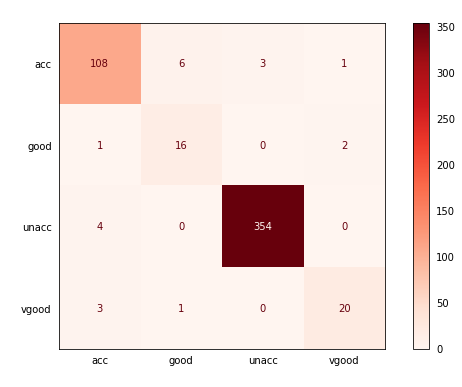

In [66]:
#plot a more detailed confusion matrix
matrix = plot_confusion_matrix(en_tree,X_test,y_test,cmap = plt.cm.Reds)
matrix.ax_.set_title('CONFUSION MATRIX', color = 'white')
plt.xlabel('Predicted Label', color = 'white')
plt.ylabel('True Label', color = 'white')
plt.gcf().axes[0].tick_params(color = 'white')
plt.gcf().axes[1].tick_params(color = 'white')
plt.gcf().set_size_inches(10,6)
plt.show()

In [67]:
#lets check the model classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_train))

              precision    recall  f1-score   support

         acc       0.93      0.92      0.92       118
        good       0.70      0.84      0.76        19
       unacc       0.99      0.99      0.99       358
       vgood       0.87      0.83      0.85        24

    accuracy                           0.96       519
   macro avg       0.87      0.89      0.88       519
weighted avg       0.96      0.96      0.96       519



### Conclusion 

1. This build is for a Decision-Tree Classifier model to predict the safety of the car.  two models were build, one with criterion `gini index` and another one with criterion `entropy`. The model yields a very good performance as indicated by the model accuracy in both the cases which was found to be 0.9595.
2. In the model with criterion `gini index`, the training-set accuracy score is 1.0000 while the test-set accuracy is 0.9595 . These two values are quite comparable. So, there is no sign of overfitting.
3. Similarly, in the model with criterion `entropy`, the training-set accuracy score is 1.0000 while the test-set accuracy to be 0.9595.We get the same values as in the case with criterion `gini`. So, there is no sign of overfitting.
4. In both the cases, the training-set and test-set accuracy score is the same. It may happen because of small dataset.
5. The confusion matrix and classification report yields very good model performance.